In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
internet = 'C:/PI2/datasets/Internet.xlsx'

In [3]:
internet_excel = pd.ExcelFile(internet)

# Acceso a las hojas específicas

In [4]:
df_velocidad = internet_excel.parse("Velocidad_sin_Rangos")
df_totales_vmd = internet_excel.parse("Totales VMD")
df_totales_dial_baf =  internet_excel.parse("Totales Dial-BAf")
df_penetracion_totales = internet_excel.parse("Penetracion-totales")
df_ingresos = internet_excel.parse("Ingresos ")

# Realizamos una inspección inicial para corroborar que estamos accediendo a dichas hojas

In [5]:
df_velocidad.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [6]:
df_totales_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [7]:
df_totales_dial_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


In [8]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [9]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


# Realizamos función auxiliar para inspeccionar datos 

In [10]:
def inspeccionar_datos(df, nombre):
    print(f"\n*** {nombre} ***")
    print(f"Dimensiones: {df.shape}")
    print("Tipos de datos:\n", df.dtypes)
    print("\nValores nulos:\n", df.isnull().sum())
    print("\nMuestra de datos:\n", df.head())

In [11]:
inspeccionar_datos(df_velocidad, "Velocidad sin Rangos")
inspeccionar_datos(df_totales_vmd, "Totales VMD")
inspeccionar_datos(df_totales_dial_baf, "Totales Dial-BAf")
inspeccionar_datos(df_penetracion_totales, "Penetración Totales")
inspeccionar_datos(df_ingresos, "Ingresos")


*** Velocidad sin Rangos ***
Dimensiones: (18884, 5)
Tipos de datos:
 Año            int64
Trimestre      int64
Provincia     object
Velocidad    float64
Accesos        int64
dtype: object

Valores nulos:
 Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

Muestra de datos:
     Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042

*** Totales VMD ***
Dimensiones: (42, 4)
Tipos de datos:
 Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object

Valores nulos:
 Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Muestra de

# Procedemos a construir graficos exploratorios para cada una de las hojas que seleccionamos para el EDA

## Velocidad sin rangos

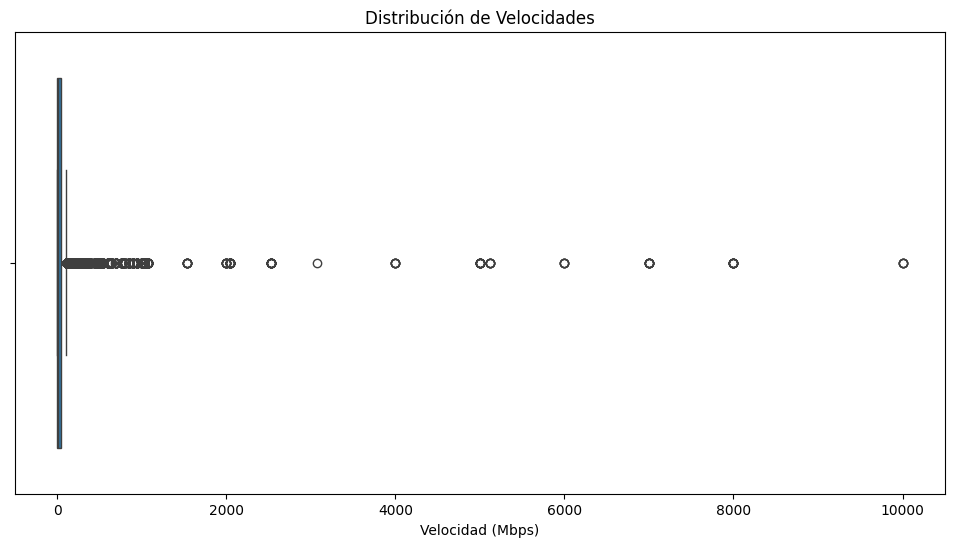

In [12]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_velocidad, x='Velocidad')
plt.title('Distribución de Velocidades')
plt.xlabel('Velocidad (Mbps)')
plt.show()

## Totales VMD 


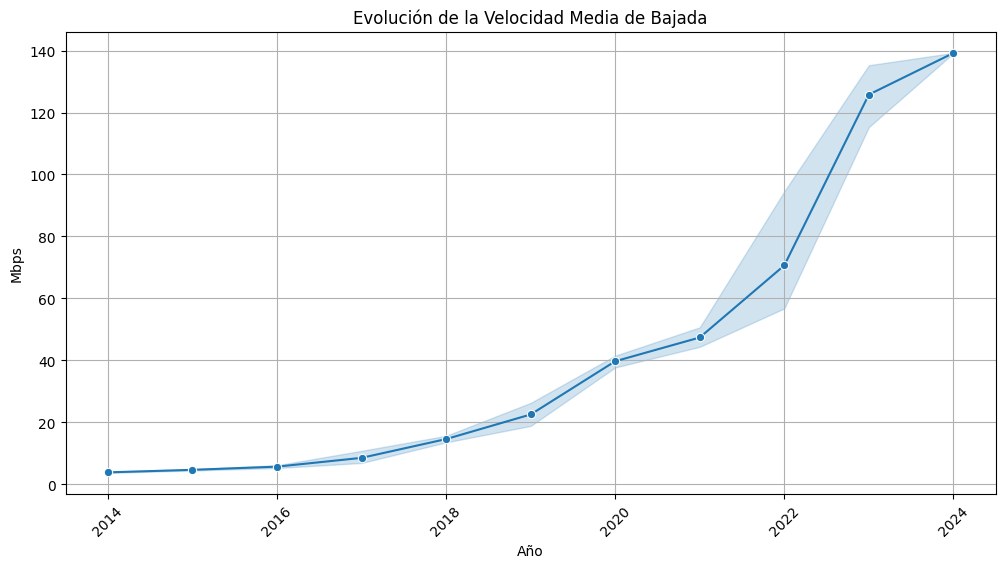

In [13]:
plt.figure(figsize=(12, 6))
df_totales_vmd_sorted = df_totales_vmd.sort_values(by='Año', ascending=True)
sns.lineplot(data=df_totales_vmd_sorted, x='Año', y='Mbps (Media de bajada)', marker='o')
plt.title('Evolución de la Velocidad Media de Bajada')
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Totales Dial-BAf

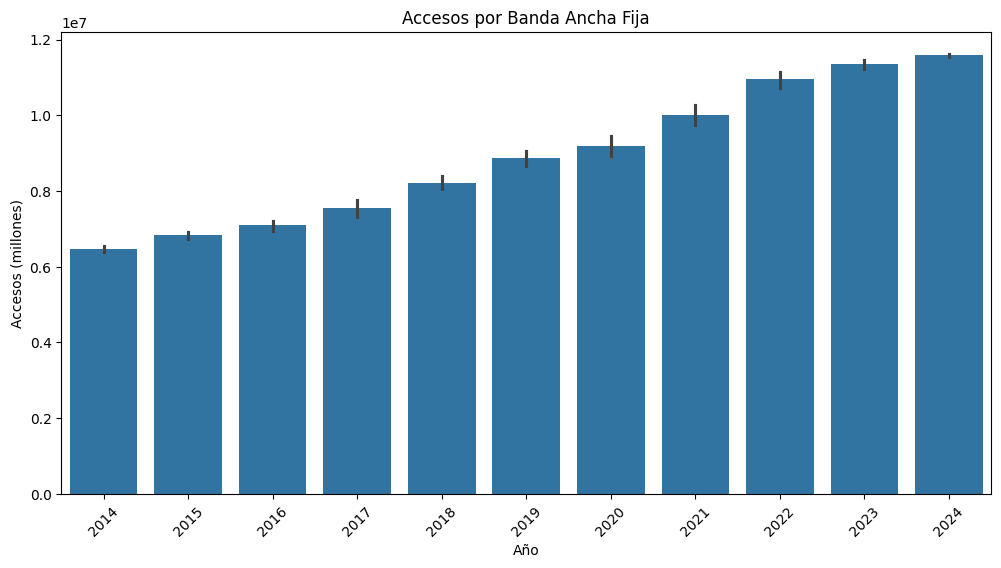

In [14]:
plt.figure(figsize=(12, 6))
df_totales_dial_baf_sorted = df_totales_dial_baf.sort_values(by='Año', ascending=True)
sns.barplot(data=df_totales_dial_baf_sorted, x='Año', y='Banda ancha fija')
plt.title('Accesos por Banda Ancha Fija')
plt.xlabel('Año')
plt.ylabel('Accesos (millones)')
plt.xticks(rotation=45)
plt.show()

## Penetraciones totales

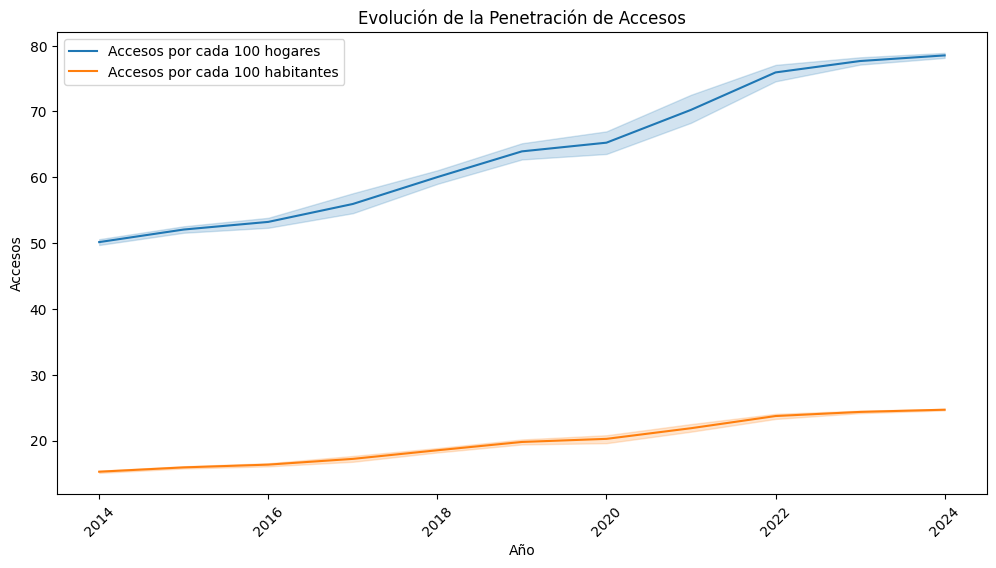

In [15]:
plt.figure(figsize=(12, 6))
df_penetracion_totales_sorted = df_penetracion_totales.sort_values(by='Año', ascending=True)
sns.lineplot(data=df_penetracion_totales_sorted, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares')
sns.lineplot(data=df_penetracion_totales_sorted, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 habitantes')
plt.title('Evolución de la Penetración de Accesos')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Ingresos

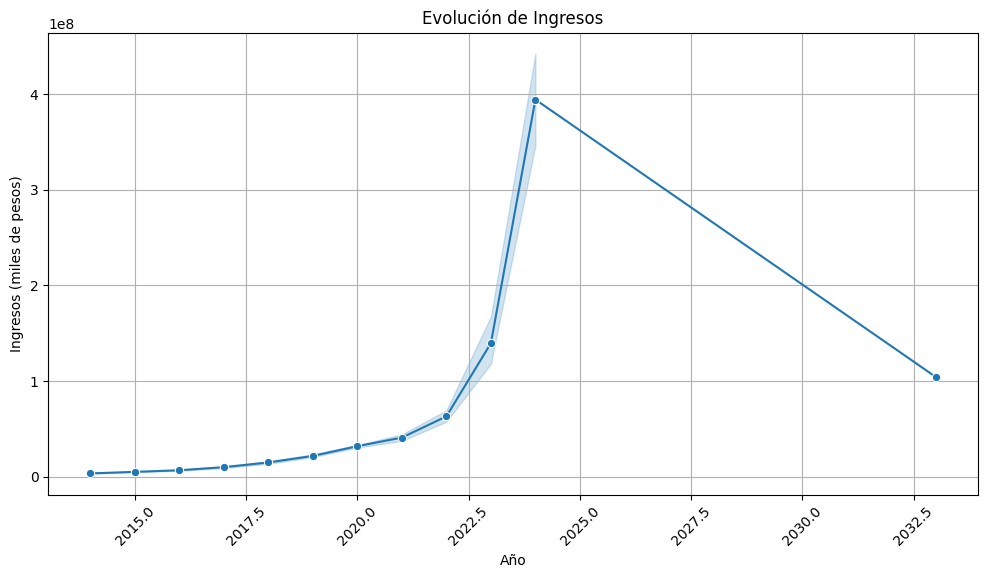

In [16]:
plt.figure(figsize=(12, 6))
df_ingresos_sorted = df_ingresos.sort_values(by='Año', ascending=True)
sns.lineplot(data=df_ingresos_sorted, x='Año', y='Ingresos (miles de pesos)', marker='o')
plt.title('Evolución de Ingresos')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Puntos destacados en el analisis en este dataset 



### Aumento en los ingresos:
    Se observa que existe una tendencia ascendente en los ingresos relacionados con las telecomunicaciones a lo largo de los años debido a: 
        Una mayor adopcion de servicios de internet
        Un incremento en los precios de los servicios
        Expansion de la cobertura en areas con baja penetracion.
        
### Penetracion de banda ancha fija:
     En la grafica de penetracion, los accesos por cada 100 hogares y cada 100 habitantes muestran una evolucion positiva.
    Esto sugiere que mas hogares y personas tienen acceso a servicios de internet, lo que podria deberse a:
       * Mejoras en la infraestructura de las telecomunicaciones
### Velocidad media de bajada:
    La velocidad media de bajada tambien muestra una mejora continua a lo largo de los años, puede ser indicativo de:
      * Implementacion de nuevas tecnologias de red (Como lo puede ser la implementacion de la fibra optica)
      * Actualizacion y mejoras de la infraestructura para soportar mayores velocidades.
### Acceso por banda ancha fija:
    La cantidad de accesos por banda ancha fija ha crecido de manera sostenida. Esto refleja la creciente adopcion de este tipo de conexion en el mercado.
### Distribucion de velocidades:
    El analisis de la distribucion de velocidades muestra una amplia gama de opciones disponibles para los usuarios, desde bajas velocidades hasta velocidades muy altas. Esto indica ina diversificacion en los planes de servicios ofrecidos por las empresas de telecomunicaciones.